In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mapcalc import Map
import matplotlib.image as mpimg
from scipy.ndimage import zoom

In [2]:
img_source = "map_source/TRIALMAP_EXPAND_3.jpg"
img = mpimg.imread(img_source)
img_gr = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

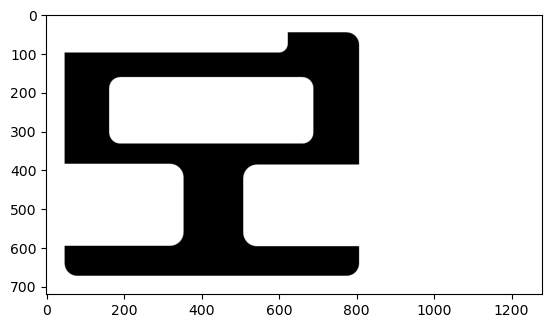

In [4]:
plt.imshow(img_gr, cmap="grey")

In [5]:
img_gr.shape

(720, 1280)

In [8]:
int(1250*1280/720)

2222

In [22]:
y_factor = 1250 / img_gr.shape[0]
x_factor = 2222 / img_gr.shape[1]
img_gr_zoom = zoom(img_gr, (y_factor, x_factor))
img_gr_zoom = np.where(img_gr_zoom > 127, 1, 0)
img_map = img_gr_zoom[:, :1500]

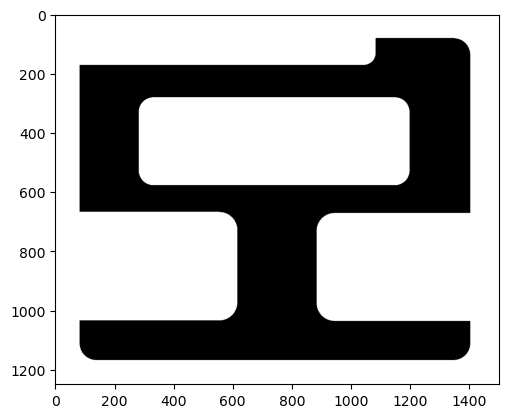

In [23]:
plt.imshow(img_map, cmap="grey")


In [24]:
np.savetxt('map_source/map_source_expand.csv', img_map, delimiter=',', fmt='%d')

In [5]:
map = Map("map_source/map_source.csv")
base_map = map.load()
robot_size = (270, 165)
start_node = (150, 150)
goal_node = (1150, 1150)

In [10]:
def new_map(map, ratio):
    new_shape = (map.shape[0] // ratio, map.shape[1] // ratio)

    # Initialize the resized map
    resized_map = np.zeros(new_shape, dtype=map.dtype)

    # Fill in the resized map
    for i in range(new_shape[0]):
        for j in range(new_shape[1]):
            block = map[i*ratio:(i+1)*ratio, j*ratio:(j+1)*ratio]
            resized_map[i, j] = np.max(block)

    return resized_map

In [11]:
s_map = list(new_map(base_map, 50))
s_start = (start_node[0]//50, start_node[1]//50)
s_goal = (goal_node[0]//50, goal_node[1]//50)
print(s_start, s_goal)

(3, 3) (23, 23)


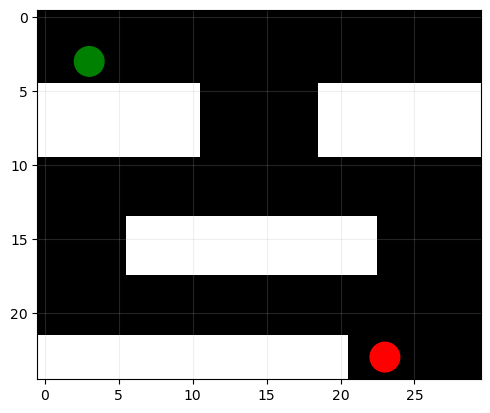

(25, 30)


In [9]:
circ1 = plt.Circle(s_start, 1, color="g")
circ2 = plt.Circle(s_goal, 1, color="r")
plt.gca().add_patch(circ1)
plt.gca().add_patch(circ2)
plt.imshow(s_map, cmap="gray")
plt.grid(alpha=0.2)
plt.show()
print(s_map.shape)

In [6]:
a_star(s_map, s_start, s_goal)

Node: (3, 3)
OL Size: 1
CL Size: 0

Node: (3, 2)
OL Size: 4
CL Size: 1

Node: (3, 2)
OL Size: 6
CL Size: 2

Node: (3, 2)
OL Size: 7
CL Size: 3

Node: (3, 2)
OL Size: 9
CL Size: 4

Node: (3, 2)
OL Size: 9
CL Size: 5

Node: (3, 2)
OL Size: 9
CL Size: 5

Node: (3, 2)
OL Size: 11
CL Size: 6

Node: (3, 2)
OL Size: 11
CL Size: 7

Node: (3, 2)
OL Size: 11
CL Size: 7

Node: (3, 2)
OL Size: 11
CL Size: 7

Node: (3, 2)
OL Size: 13
CL Size: 8

Node: (3, 2)
OL Size: 13
CL Size: 9

Node: (3, 2)
OL Size: 13
CL Size: 9

Node: (3, 2)
OL Size: 13
CL Size: 9

Node: (3, 2)
OL Size: 13
CL Size: 9

Node: (3, 2)
OL Size: 15
CL Size: 10

Node: (3, 2)
OL Size: 15
CL Size: 11

Node: (3, 2)
OL Size: 15
CL Size: 11

Node: (3, 2)
OL Size: 15
CL Size: 11

Node: (3, 2)
OL Size: 15
CL Size: 11

Node: (3, 2)
OL Size: 15
CL Size: 11

Node: (3, 2)
OL Size: 17
CL Size: 12

Node: (3, 2)
OL Size: 17
CL Size: 13

Node: (3, 2)
OL Size: 17
CL Size: 13

Node: (3, 2)
OL Size: 17
CL Size: 13

Node: (3, 2)
OL Size: 17
CL Size: 1

KeyboardInterrupt: 

In [1]:
from astar_2 import astar

In [3]:
main()

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]


In [18]:
path = astar(base_map, start_node, goal_node)
print(path)

[(150, 150), (151, 151), (152, 152), (153, 153), (154, 154), (155, 155), (156, 156), (157, 157), (158, 158), (159, 159), (160, 160), (161, 161), (162, 162), (163, 163), (164, 164), (165, 165), (166, 166), (167, 167), (168, 168), (169, 169), (170, 170), (171, 171), (172, 172), (173, 173), (174, 174), (175, 175), (176, 176), (177, 177), (178, 178), (179, 179), (180, 180), (181, 181), (182, 182), (183, 183), (184, 184), (185, 185), (186, 186), (187, 187), (188, 188), (189, 189), (190, 190), (191, 191), (192, 192), (193, 193), (194, 194), (195, 195), (196, 196), (197, 197), (198, 198), (199, 199), (200, 200), (201, 201), (202, 202), (203, 203), (204, 204), (205, 205), (206, 206), (207, 207), (208, 208), (209, 209), (210, 210), (211, 211), (212, 212), (213, 213), (214, 214), (215, 215), (216, 216), (217, 217), (218, 218), (219, 219), (220, 220), (221, 221), (222, 222), (223, 223), (224, 224), (225, 225), (226, 226), (227, 227), (228, 228), (229, 229), (230, 230), (231, 231), (232, 232), (23

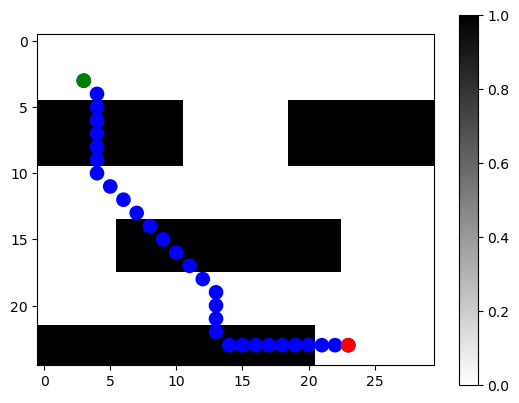

In [16]:
plt.imshow(s_map, cmap=plt.cm.gray_r)
for i in path:
    plt.gca().add_patch(plt.Circle(i, 0.5, color="b"))
start_point = plt.Circle(s_start, 0.5, color="g")
destination_point = plt.Circle(s_goal, 0.5, color="r")
plt.colorbar()
plt.gca().add_patch(start_point)
plt.gca().add_patch(destination_point)
plt.show()

In [20]:
def flip_tuples(tuple_list):
    return [(t[1], t[0]) for t in tuple_list]

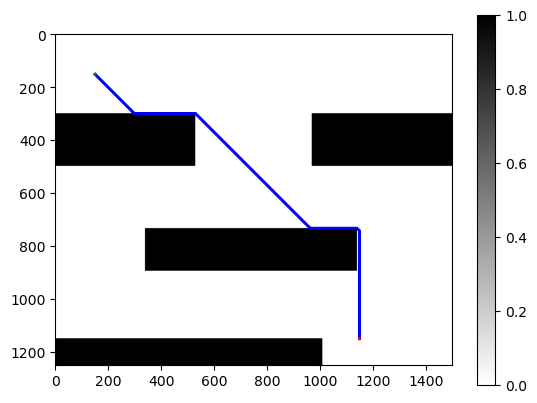

In [21]:
plt.imshow(base_map, cmap=plt.cm.gray_r)
for i in flip_tuples(path):
    plt.gca().add_patch(plt.Circle(i, 2, color="b"))
start_point = plt.Circle(start_node, 4, color="g")
destination_point = plt.Circle(goal_node, 4, color="r")
plt.colorbar()
plt.gca().add_patch(start_point)
plt.gca().add_patch(destination_point)
plt.show()